In [101]:
import boto3
from os import environ
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [102]:
session = boto3.Session(
    aws_access_key_id=environ["LEO_AWS_ID"],
    aws_secret_access_key=environ["LEO_AWS_KEY"]
)

In [103]:
s3 = session.resource("s3")
bucket = s3.Bucket("color-controversy-backup")

In [104]:
bucket.download_file('judge_count.txt', '/tmp/judge_count.txt')

In [105]:
with open("/tmp/judge_count.txt") as f:
    data = f.readlines()

In [107]:
df = pd.DataFrame((d.strip().split(", ") for d in data), columns=["date", "counts"])
df["counts"] = df["counts"].astype(float)
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d_%H_%M_%S")\
    .dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.tz_localize(None)
df.tail()

,date,counts
1672,2020-10-28 14:01:02,688427.0
1673,2020-10-28 15:01:02,693202.0
1674,2020-10-28 16:01:02,696792.0
1675,2020-10-28 17:01:02,699531.0
1676,2020-10-28 18:01:02,701551.0


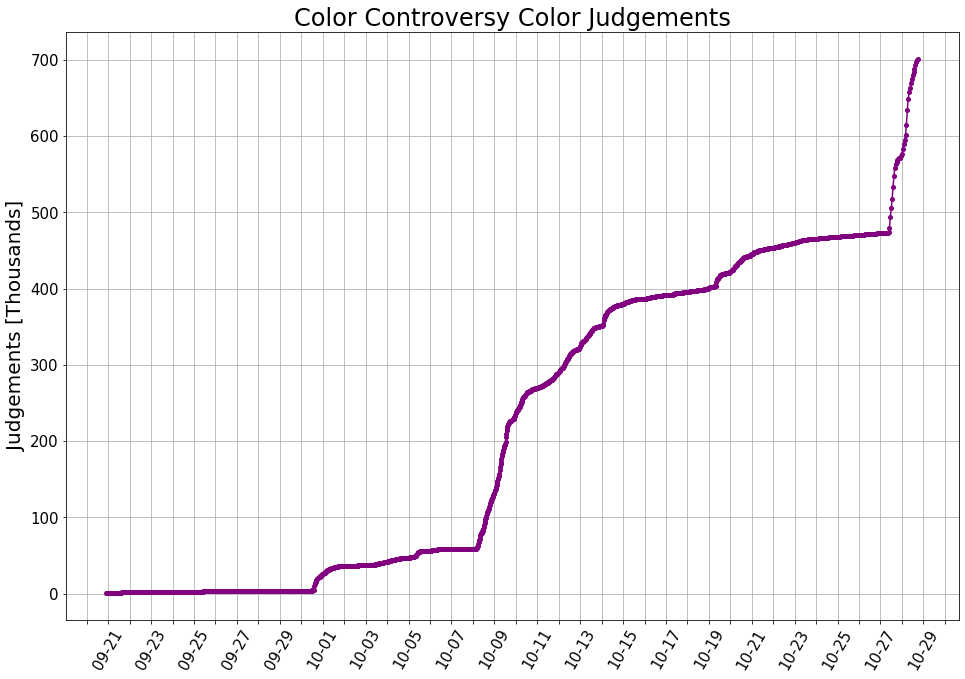

In [109]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(df.date.values, df.counts.values / 1000, marker='o', markersize=4, c='purple')

ax.set_title("Color Controversy Color Judgements", fontsize=24)
ax.set_ylabel("Judgements [Thousands]", fontsize=20)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.tick_params(axis='both', which='major', labelsize=15)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
ax.grid()
fig.autofmt_xdate(rotation=60, ha="center")